In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data=pd.read_csv('/content/years_of_exp.csv')
data

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [17]:
data.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [18]:
data.tail()

,age,experience,income
15,41,6,38900
16,58,17,63600
17,23,1,30870
18,44,9,44190
19,37,10,48700


In [19]:
data.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [20]:
data.shape

(20, 3)

In [21]:
data.isnull().sum()

,0
age,0
experience,0
income,0


In [22]:
data.dtypes

,0
age,int64
experience,int64
income,int64


In [23]:
data=data.dropna()
data

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [31]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [32]:
print(x)

[[25  1]
 [30  3]
 [47  2]
 [32  5]
 [43 10]
 [51  7]
 [28  5]
 [33  4]
 [37  5]
 [39  8]
 [29  1]
 [47  9]
 [54  5]
 [51  4]
 [44 12]
 [41  6]
 [58 17]
 [23  1]
 [44  9]
 [37 10]]


In [33]:
print(y)

[30450 35670 31580 40130 47830 41630 41340 37650 40250 45150 27840 46110
 36720 34800 51300 38900 63600 30870 44190 48700]


In [76]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [81]:
print(X_train)

[[37  5]
 [51  7]
 [47  9]
 [32  5]
 [44  9]
 [58 17]
 [51  4]
 [47  2]
 [39  8]
 [37 10]
 [43 10]
 [54  5]
 [33  4]
 [29  1]
 [44 12]
 [28  5]]


In [42]:
print(X_test)

[[25  1]
 [23  1]
 [41  6]
 [30  3]]


In [43]:
print(y_test)

[1 2 8 5]


In [44]:
print(y_train)

[10 12 15  9 13 19  4  3 14 17 16  6  7  0 18 11]


In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
print(X_train)

[[-0.58553507 -0.52500136]
 [ 1.01397536 -0.01590913]
 [ 0.55697238  0.49318309]
 [-1.15678879 -0.52500136]
 [ 0.21422015  0.49318309]
 [ 1.81373058  2.52955199]
 [ 1.01397536 -0.77954747]
 [ 0.55697238 -1.28863969]
 [-0.35703358  0.23863698]
 [-0.58553507  0.7477292 ]
 [ 0.0999694   0.7477292 ]
 [ 1.3567276  -0.52500136]
 [-1.04253805 -0.77954747]
 [-1.49954103 -1.5431858 ]
 [ 0.21422015  1.25682143]
 [-1.61379177 -0.52500136]]


In [83]:
print(X_test)

[[-1.95654401 -1.5431858 ]
 [-2.1850455  -1.5431858 ]
 [-0.12853209 -0.27045524]
 [-1.38529028 -1.03409358]]


In [84]:
numeric_dataset = data.select_dtypes(include=[np.number])
correlation = numeric_dataset.corr()

<Axes: >

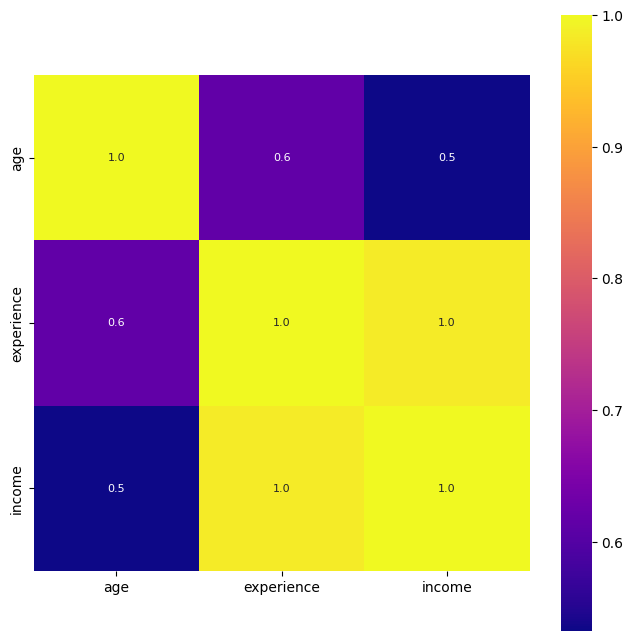

In [54]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='plasma')

In [85]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred = regressor.predict(X_test)


In [94]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 304.7132894412765
R-squared (R²): -39.628438592170205
